# Human TTN遺伝子上のmotif配列の統計および可視化

## 準備

In [13]:
# オリジナルモジュールのインポート
from lib.introngap import PileUp
from lib.gbkparse import Seq_count

# モジュールのインポート
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [14]:
# クラスのインスタンス化
gbk = Seq_count()

# gbkファイルの読み込み
gbk.read_gbk('../data/gbk/human_ttn.gb')

In [15]:
# 登録されているmRNAのIDを取得
for i in gbk.get_mrna_ids():
    gbk.set_mrna_id(i)
    print(i,gbk.intron_num())

NM_003319.4 190
NM_133437.4 191
NM_133432.3 191
NM_133378.4 311
XM_017004821.1 335
NM_001256850.1 312
NM_001267550.2 362
XM_017004820.1 335
XM_024453099.1 190
XM_017004823.1 191
XM_047445668.1 276
XM_024453098.1 271
XM_024453097.1 272
XM_017004822.1 273
XM_047445665.1 281
XM_047445663.1 299
XM_024453095.1 309
XM_047445660.1 316
XM_047445661.1 312
XM_017004819.1 358
NM_133379.5 45
XM_024453100.2 183


In [16]:

# トランスクリプトバリアントの設定
gbk.set_mrna_id('NM_001267550.2')

## n個の塩基の組み合わせ配列を作成、イントロン内のそれぞれの配列の個数を可視化

In [17]:
# n個の塩基の組み合わせ配列を作成
# intron_motif_stats関数で、すべてイントロン領域の配列の個数をカウント
# その後、カウントした個数を全体の個数で割ることで、頻度を算出
n = 4
df = gbk.intron_motif_stats(intron=1, n=n) 
for i in range(gbk.intron_num()-1):
    tmp_df = gbk.intron_motif_stats(intron=i+2, n=n)
    tmp_df.columns = [f'intron_{i+2}']
    df = pd.merge(df, tmp_df, left_index=True, right_index=True)
ndf = df/df.sum(axis=0)

In [18]:
# ヒートマップで各イントロンの組み合わせ配列の頻度を可視化
tndf = ndf.T
fig = px.imshow(tndf, text_auto=True)
fig.update_layout(width=800, height=800)
fig.show()

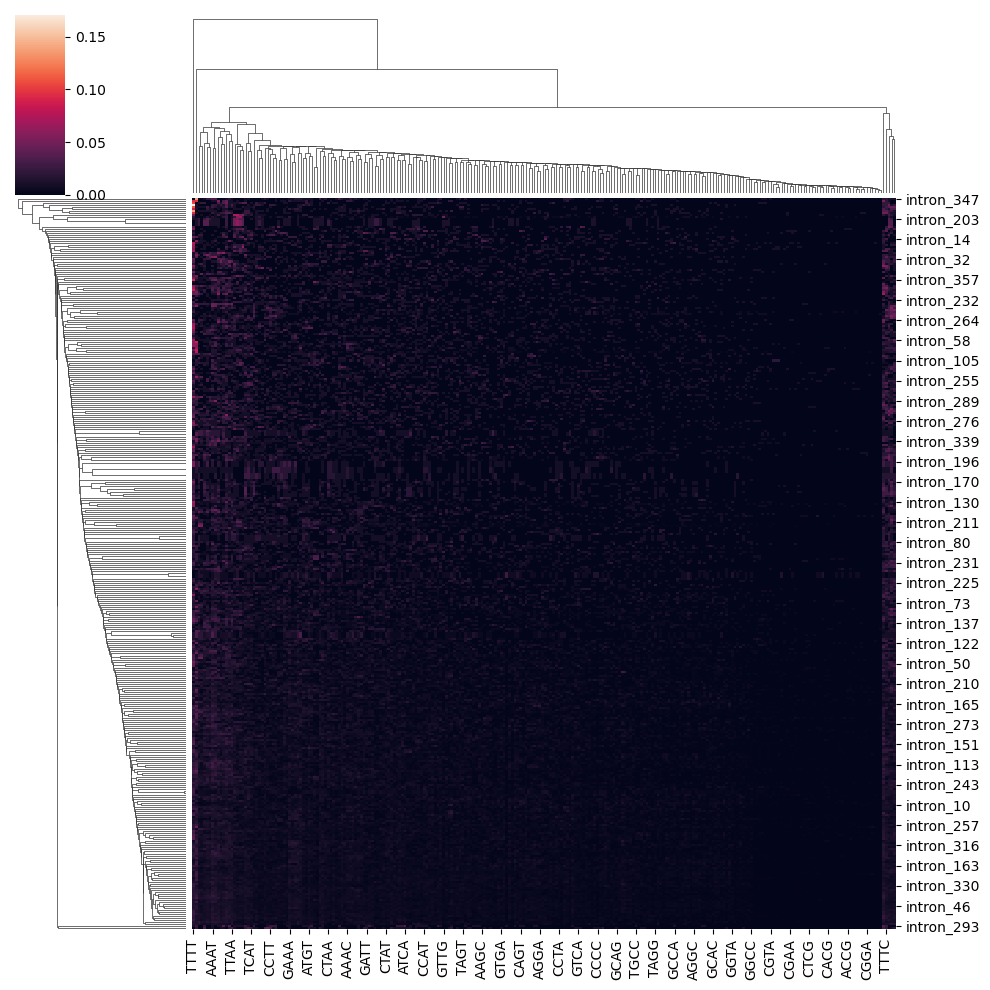

In [19]:
# クラスタリングを実施
g = sns.clustermap(tndf)
reordered_index = tndf.index[g.dendrogram_row.reordered_ind]
reordered_columns = tndf.columns[g.dendrogram_col.reordered_ind]
clustered_tndf = tndf.loc[reordered_index, reordered_columns]
clustered_tndf

# クラスタリング後のヒートマップを可視化
fig = px.imshow(clustered_tndf, text_auto=True)
fig.update_layout(width=800, height=800)
fig.show()

## 特定のイントロン領域の配列を表示

In [20]:
# イントロン172,181,190,203の配列を取得
ls = [172, 181, 190, 203]
ls.sort()
for i in ls:
    print(i, gbk.intron_seq(i))


172 GTAGACACCCTCTTGTTGCTGTGTTTGATATTGTTTGTTTGTCTTTACTTTGTCTAATAATGAAAATACTAATATCTTTAAAG
181 GTAGACACCCTCTTGTTGCTGTGTTTGATATTGTTTGTTTGTCTTTACTTTGTCTAATAATGAAAATACTAATATCTTTAAAG
190 GTAGACACCCTCTTGTTGCTGTGTTTGATATTGTTTGTTTGTCTTTACTTTGTCTAATAATGAAAATACTAATATCTTTAAAG
203 GTAGACACCCTCATGGTGCTGTGTTTGATATTGTTTGTTTGTCTTTACTTTGTCTAACAATGAAAATAATAATATCTTTTAAAG


In [25]:
# イントロン176,178,185,187,194,196の配列を取得
ls = [176, 178, 185, 187, 194, 196]
for i in ls:
    print(i, gbk.intron_seq(i))

176 GTACATGTCAGCTCAACCTTATCCTGCAGAAGAAATCTCTCTTCCATTCCTGAAAACAATTTTAGTCCATTCCTCTTCATTAACCTAAGTATAAAACTACTAATATCTTTCAAG
178 GTATTTTTTACCCCTGTCCTTTTTCTGCAGAAGAAATATCTCTTCTGATCTTAGAAATATTTTACTCCATTTGTCTCATTAACCTAAGTGAAAAACTACTAATATCTTTCAAG
185 GTACATGTCAGCTCAACCTTATCCTGCAGAAGAAATCTCTCTTCCATTCCTGAAAACAATTTTAGTCCATTCCTCTTCATTAACCTAAGTATAAAACTACTAATATCTTTCAAG
187 GTATTTTTTACCCCTGTCCTTTTTCTGCAGAAGAAATATCTCTTCTGATCTTAGAAATATTTTACTCCATTTGTCTCATTAACCTAAGTGAAAAACTACTAATATCTTTCAAG
194 GTACATGTCAGCTCAACCTTATCCTGCAGAAGAAATCTCTCTTCCATTCCTGAAAACAATTTTAGTCCATTCCTCTTCATTAACCTAAGTATAAAACTACTAATATCTTTCAAG
196 GTATTTTTTACCCCTGTCCTTTTTCTGCAGAAGAAATATCTCTTCTGATCTTAGAAATATTTTACTCCATTTGTCTCATTAACCTAAGTGAAAAACTACTAATATCTTTCAAG


In [27]:
# イントロン169,170,198,199,200,201,202の配列を取得
ls = [169, 170, 198, 199, 200, 201, 202]
ls.sort()
for i in ls:
    print(i, gbk.intron_seq(i))

169 GTATTTGTCACTGACTTTAGGCTTCAGAAGACCTAATTCTTCTGCTCTTGACAATATTTTTTTCTAGCGGTCTTCATAACACCTAAATGTAATTTCACTAATATCTTTCAAG
170 GTAGTTGCCACTGACCTTAGGCTTCAGATCTCATTCTTTTGCTCTTGAAGATATTTTTTCCAGTGGTCTTCATAACTTCTGAATGTAATTTTGCTAATATCTTTTAAG
198 GTATTTGTCACTGACCTTAGGCTTCAGATGATCTAATTCTTTTGCAGTTGAAGACATTTTGTTCCAGTGGTCTTCATAACCCCTAAATGTAATTTTACCTAATATCTTTTAAG
199 GTATTTGTCACTGGCTTTAGGCTTCAGAAGACTGAACTCTTCATTTCTTGAAAATACTTTTCTAGTGGTCTTCAAACTTCTAAATGTAATTTCACTAATATCTTTTAAG
200 GTATTTGTCACTGGCTTTAGGCTTCAGAAGATCAAACTCCTCTATTCTTGAAAATATTTTTTCTAGTGGTCTTCATAACCCCTAAATGTAATTTCACTAATATCTTTTAAG
201 GTATTTGTCATTGAGTTTAAGCGTCAGAAGATCTATCTCTTCTACTCTTGAAAATATTTTTCCTAATGGTCTTCATAACTTCTAAATGTAATTTCACTAATATCTTTTAAG
202 GTATTTGTCACTGATTTTAGGCTTCAGATGATCAAACTCTTCTGCTCTGGAAAGTATTTTTCTAGTGGTCTTCATAATGCCTAAATGTAATTTCACTATTATCTTTCAAG


In [30]:
# イントロン235,245,290,297,299,314,323,355の配列を取得
ls = [235, 245, 290, 297, 299, 314, 323, 355]
ls.sort()
for i in ls:
    print(i, gbk.intron_seq(i))

235 GTAAATAGTTTTATCAAATAGTCCACCCCAAAATCATTTTTTTTGCCTTTAGTTTTATATTTCTTCTTTAAAGTGCTTCAATTAATAAGTTCTTTCTTTTTTTTCTTGATAG
245 GTATGAAAACTACAGTGAATAATCTTTTATTTCTAACAATTCACACTTGCTAGATTTAAAGTACAAAGACATATGTTTCTAATATCTTGTAACTTTTTCTTCCCAG
290 GTAAGTAGGAGAACATTTTCACATACAAAGCCATTTTTACTTTTTTTTTAAATTTCTTATAATCAATATGATCTTTTTCACAG
297 GTAAGTCTTATTTAGTGGAAAGAATAGATCTTCTGTTCTTTCAAAAGCAGAAATGGCAATAACATTTTGTGCCATGATTTTTTTTTTCTGCAG
299 GTATAGTATTAATGGATTTATTCAGTTTTCATGTTATCTAACTTTGTTTTCAGCTATATGCTAATTCGTTTTTTACTTTTATTTTTTAG
314 GTAGGAACATTTCCCGGTGGTTTTTCATTTTATTTTTTAAAATTATCTTTTAGCCTGGGAAATTAACTTTTCAATCAATTTCTGCAG
323 GTAGGTCCATTTTACTTTTTATGTACTTTTTTTTTTAAAGCAAATTAAGCCTCCTTCCTTTTCTGATTAAAATGTATTTTTTTCTTTGCAG
355 GTATTTTATTTTTATTTTCAGTGCTTTTTATTTTTAAAGAAAAAAAAATCTCAAAAACACACTATGAAAACCACCACAATTGTATTTTCCCCCAACAG
